# Predicting the Credit Risk of Customers (Good or Bad).

The objective of this case study is to fit and compare 4 different binary classification models (classifiers) to predict whether a customer has good credit history or bad using the German Credit dataset. The dataset is sourced from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

The dataset contains 20 descriptive feature with 1 binary class feature. Out of the 20 descriptive features 7 features are numerical while 13 are categorical. All of the categorical features are represented with some coding format which is explained below. The class feature has two classes 'Good' which is represented as '1' and 'Bad' which is represented as '2' respectively. The whole dataset contains 1000 observation instances.

This report is organized as follows:
- [Section 2 (Overview of the Data)](#2) Provides details of the features in the dataset along with their meaning. 
- [Section 3 (Data Preparation)](#3) Summarizes the data preparation steps taken to fit the data in classification models . 
- [Section 4 (Data Exploration)](#4) Explains relationship between different columns using various graphs and visualization techniques.
- [Section 5 (Feature Selelction and Ranking)](#5) This section helps to rank and select the important feature for the further modelling.
- [Section 6 (Data Modelling)](#6) This section first fits data into 4 different binary classification models and build classifiers.
- [Section 7 (Hyperparameter Tuning)](#7)This section describes the hyperparameter tuning process for each classification algorithm.
- [Section 8 (Performance Evaluation)](#8) This section calculates the performance of each of the classification model after HP tuning. 
- [Section 9 (Limitations and proposed Solutions)](#9) This section defines the limiations of the models and proposes future scope and solutions.
- [Section 10 (Summary and Conclusion)](#10) provides a result of our experiment and a brief summary of our work in this report.
- [Section 11(References)](#11) provides the reference of sources used for this project.

This is Jupyter Notebook file contains both narratives as well as the related Python 3.6 codes.


In [1]:
## Comaptibility of Altair to Jupyter Notebook.
## The code below require Altair version 3.0 or above which indeed require Jupyter lab version 1.0 or above. 
## To process and update the same the following code needs to be uncommented and Vega package needs to be installed.
## We need to execute this code each time loading this page. We have to Restart Kernel and clear output after executing the below commands.

##%%capture
##!pip install --upgrade altair
##!pip install vega vega_datasets
##!pip install --upgrade pip --user

# Overview of the Data. <a class="anchor" id="2"></a>

### Information about the data and its features.

The dataset classifies people described by a set of attributes as good or bad credit risks. The Dataset contains 20 Descriptive features whoes values are encoded in the below mentioned format. The class feature variable is 21st feature which have two different classes 1 and 2. '1' represents 'good' credit risk while '2' represents 'bad' credit risks. Below are the Feature Values and Attribute Information :

Attribute 1: Status of existing checking account (categorical)
- A11 : ... < 0 DM
- A12 : 0 <= ... < 200 DM
- A13 : ... >= 200 DM 
- A14 : no checking account

Attribute 2: Duration in month (numerical)

Attribute 3: Credit history (categorical)
- A30 : no credits taken/ all credits paid back duly
- A31 : all credits at this bank paid back duly
- A32 : existing credits paid back duly till now
- A33 : delay in paying off in the past
- A34 : critical account/ other credits existing (not at this bank)

Attribute 4: Purpose (categorical)
- A40 : car (new)
- A41 : car (used)
- A42 : furniture/equipment
- A43 : radio/television
- A44 : domestic appliances
- A45 : repairs
- A46 : education
- A47 : (vacation - does not exist?)
- A48 : retraining
- A49 : business
- A410 : others

Attribute 5: Credit amount (numerical)

Attibute 6: Savings account/bonds (categorical)
- A61 : ... < 100 DM
- A62 : 100 <= ... < 500 DM
- A63 : 500 <= ... < 1000 DM
- A64 : .. >= 1000 DM
- A65 : unknown/ no savings account

Attribute 7: Present employment since (categorical)
- A71 : unemployed
- A72 : ... < 1 year
- A73 : 1 <= ... < 4 years
- A74 : 4 <= ... < 7 years
- A75 : .. >= 7 years

Attribute 8: Installment rate in percentage of disposable income (numerical)

Attribute 9: Personal status and sex(categorical)
- A91 : male : divorced/separated
- A92 : female : divorced/separated/married
- A93 : male : single
- A94 : male : married/widowed
- A95 : female : single

Attribute 10: Other debtors / guarantors (categorical)
- A101 : none
- A102 : co-applicant
- A103 : guarantor

Attribute 11: Present residence since (numerical)

Attribute 12: Property (categorical)
- A121 : real estate
- A122 : if not A121 : building society savings agreement/ life insurance
- A123 : if not A121/A122 : car or other, not in attribute 6
- A124 : unknown / no property

Attribute 13: Age in years (numerical)

Attribute 14: Other installment plans (categorical)
- A141 : bank
- A142 : stores
- A143 : none

Attribute 15: Housing (categorical)
- A151 : rent
- A152 : own
- A153 : for free

Attribute 16: Number of existing credits at this bank (numerical)

Attribute 17: Job (categorical)
- A171 : unemployed/ unskilled - non-resident
- A172 : unskilled - resident
- A173 : skilled employee / official
- A174 : management/ self-employed/highly qualified employee/ officer

Attribute 18: Number of people being liable to provide maintenance for(numerical)

Attribute 19: Telephone (categorical)
- A191 : none
- A192 : yes, registered under the customers name

Attribute 20: foreign worker (categorical)
- A201 : yes
- A202 : no

Attribute 21: Credit Risk (Class Feature)
- 1 : Good
- 2 : Bad

---

### Methodology

We are considering the below 4 binary classifiers to predict the target feature:
- K-Nearest Neighbour (KNN)
- Decision Tree (DT)
- Random Forest Ensemble (RF)
- Naive Bayes (NB)

Before we start the modeling process, we try to find the relations between some descriptive features using some graphs and visualization techniques. This report includes 3 One-Variable graphs, 3 Two-Variable graphs and 3 Three-Variable graphs to explore the relation between them.

The Modeling starts with the cleansing of the data and then transforming it into the classifier readable format. This transformation includes encoding the categorical descriptive features and then scaling them using one of the SKlearn scalars. First we split the dataset into training and test sets with 70:30 ratio. That means:
  * The randomly selected 700 observation instances of the data are used during HP tuning phase called as **Training Data**
  * Remaining selected 300 observation instances are used for performance evaluation and comparison called as **Test Data**

In the next step we try to find, the most important features in the training data. We select those features using **RFI (Random Forest Importance)** method. We consider top 10, 20 and full set of features after encoding (59) after encoding the categorical features. In the next step to tune the hyperparameter in each classifier we use 5-fold stratified cross-validation using ROC_AUC as a performance metric. As the class feature contain more customers with 'Good' credit risks (imbalanced class issue), ROC_AUC is crucial to test the performance of each of the classifier as it is robust to this issue. We also tried to find out sensitivity of each model by plotting the ROC graph of the performance of each model.

Classifiers with the best performance with hyperparameter values as identified via grid search on the training data are called **tuned** classifiers. When we find 4 tuned classifiers, we fit them on the test dataset  and we perform paired t-test to check the statistical significance of each of their performance. And in addition to this, we try to compare the confusion matrices of classifiers on the test data.  

---

# Data Preparation <a class="anchor" id="3"></a>

### Load Dataset

We load the dataset from the local repository using `read_csv` function of a `Pandas` package. The Original dataset dont have feature labels associated with it. So we provide appropriate feature labels as per the feature information stated above.

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline 

pd.set_option('display.max_columns', None)


attrnames = ['Existing_CA_Status', 'Duration_Months', 'Credit_History', 'Purpose', 'CR_Amount', 'Saving_Acc', 'Present_Employment',
             'Inst_Rate', 'Gender_Status', 'Other_Debtors', 'Present_Residence_Time', 'Property', 'Age_Years', 'Inst_Plans', 'Housing',
             'Exsisting_CR_Count', 'Job', 'Liability_Count', 'Telephone_Status', 'Foreign_Worker', 'Credit_Risk_Status']

dataset = pd.read_csv("S3779009_Data.csv", header = None, names = attrnames)

#print(f"Shape of the dataset is {dataset.shape} \n")

In [3]:
#print(f"Data types are below where 'object' indicates Categorical Feature: ")
print(dataset.dtypes)

Existing_CA_Status        object
Duration_Months            int64
Credit_History            object
Purpose                   object
CR_Amount                  int64
Saving_Acc                object
Present_Employment        object
Inst_Rate                  int64
Gender_Status             object
Other_Debtors             object
Present_Residence_Time     int64
Property                  object
Age_Years                  int64
Inst_Plans                object
Housing                   object
Exsisting_CR_Count         int64
Job                       object
Liability_Count            int64
Telephone_Status          object
Foreign_Worker            object
Credit_Risk_Status         int64
dtype: object


The full data has 1000 observation instances. It has 20 descriptive feature including (13 Categorical features and 7 Numerical features) and "Credit-Risk-Status" as a target feature.

### Checking for Missing Values

Lets make sure that we do not have missing values in each of the feature of the dataset. We can do that by using `isnull()` function. 

In [4]:
print("\nCount of missing values in each feature of a dataset: ")
print(dataset.isnull().sum())


Count of missing values in each feature of a dataset: 
Existing_CA_Status        0
Duration_Months           0
Credit_History            0
Purpose                   0
CR_Amount                 0
Saving_Acc                0
Present_Employment        0
Inst_Rate                 0
Gender_Status             0
Other_Debtors             0
Present_Residence_Time    0
Property                  0
Age_Years                 0
Inst_Plans                0
Housing                   0
Exsisting_CR_Count        0
Job                       0
Liability_Count           0
Telephone_Status          0
Foreign_Worker            0
Credit_Risk_Status        0
dtype: int64


We will take look at some sample observations of the data by using `sample()` function.

In [5]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Sample of a dataset</b>'))
dataset.sample(n=5, random_state=999)

,Existing_CA_Status,Duration_Months,Credit_History,Purpose,CR_Amount,Saving_Acc,Present_Employment,Inst_Rate,Gender_Status,Other_Debtors,Present_Residence_Time,Property,Age_Years,Inst_Plans,Housing,Exsisting_CR_Count,Job,Liability_Count,Telephone_Status,Foreign_Worker,Credit_Risk_Status
842,A14,18,A32,A45,1943,A61,A72,4,A92,A101,4,A121,23,A143,A152,1,A173,1,A191,A201,2
68,A14,36,A32,A46,1819,A61,A73,4,A93,A101,4,A124,37,A142,A153,1,A173,1,A192,A201,2
308,A12,8,A32,A42,1237,A61,A73,3,A92,A101,4,A121,24,A143,A152,1,A173,1,A191,A201,2
881,A14,24,A32,A41,9277,A65,A73,2,A91,A101,4,A124,48,A143,A153,1,A173,1,A192,A201,1
350,A14,9,A32,A44,1236,A61,A72,1,A92,A101,4,A121,23,A143,A151,1,A173,1,A192,A201,1


### Checking for ID-Like Features, Constant Features and Other Redundant Features

Sometimes Data may contain some ID columns such as CustomerID or RecordID which is just for the recording purpose. This feature is not useful for the classification purpose. Hence we have to drop such features from the dataset in the preparation step only. Our Dataset doesnot have any ID-Like feature present.

Next step in the Data Preparation is to check Constant as well as other Redundant features which we have to drop before going forward. We check the Unique values in each feature and drop the feature if that feature has only 1 Unique value. That means its a constant feature.

In [6]:
dataset = dataset.loc[:, dataset.nunique() != 1]
dataset.shape

(1000, 21)

The Shape of the dataset is still the same after removing constant features that implies we dont have constant features in our dataset.

### Summary Statistics

The summary statistics of both Categorical features and Numerical features are shown below. We can find some interesting facts about the data by exploring it. 

In [7]:
display(HTML('<b>Table 1: Summary Statistics of Categorical Features</b>'))
dataset.describe(include = np.object)

,Existing_CA_Status,Credit_History,Purpose,Saving_Acc,Present_Employment,Gender_Status,Other_Debtors,Property,Inst_Plans,Housing,Job,Telephone_Status,Foreign_Worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [8]:
display(HTML('<b>Table 1: Summary Statistics of Numerical Features</b>'))
dataset.describe(include = np.number)

,Duration_Months,CR_Amount,Inst_Rate,Present_Residence_Time,Age_Years,Exsisting_CR_Count,Liability_Count,Credit_Risk_Status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


We can see from the Table 2 that, target feature 'Credit-Risk-Status' has two classes '1' represents 'Good' credit risk factor while '2' represents 'Bad' credit risk factor.  We can check the target feature balance by checking number of class values of the target feature.
We will use `value_counts()` for this purpose.

In [9]:
print("\nPercentage of class values in the target feature are: ")
print(dataset['Credit_Risk_Status'].value_counts(normalize = True)*100)


Percentage of class values in the target feature are: 
1    70.0
2    30.0
Name: Credit_Risk_Status, dtype: float64


We can see from above result that, more number of observations have 'Credit-Risk-Status' as 'Good' than number of 'Bad' 'Credit-Risk-Status' observations. This is an example of typical class imbalance issue. That gives us idea that, we have to use some different performance metric while model evaluation than 'Precision' or 'Recall'. Hence, we are using 'ROC_AUC' metric which is robust to this problem.

# Data Exploration <a class="anchor" id="4"></a>


### Univariate Data Visualisation


#### 1. Box Plot of Age
- `Figure 1` shows the Box Plot of Age. 
- It can be observed that the Age numerical attribute is Right Skewed.


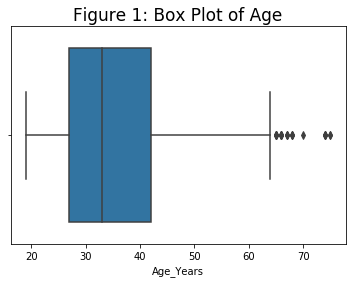

In [10]:
sns.boxplot(dataset['Age_Years']).set_title("Figure 1: Box Plot of Age", fontsize = 17)
plt.show()

#### 2. Pie Chart of Foriegn Worker

- `Figure 2` represents proportion of foreign workers in the data.
- The data is depicted using a pie chart.
- It is observed that approximately `96%` values are A201 that is `foreign workers`.

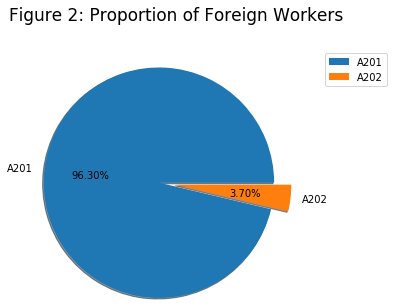

In [11]:
a = dataset['Foreign_Worker'].value_counts()
x1 = a.index
fig1 = plt.figure()
ax = fig1.add_axes([0,0,0.5,0.5])
ax.set_title("Figure 2: Proportion of Foreign Workers",fontsize = 17,x=0.5,y=1.6)
ax.pie(a,autopct ='%.2f%%',labels = x1,shadow = True,explode=(0.3,0),radius = 2.0)
ax.legend(loc = "right", bbox_to_anchor=(2,1.3,0,0))
plt.show()

#### 3. Pie Chart of Present Employment Duration
- The following graph shows the proportion of people in the data set and thier respective Employement Duration.
- It can be observed that the Maximum proportion of people approximately `34%` are in between `1 to 4 years`.

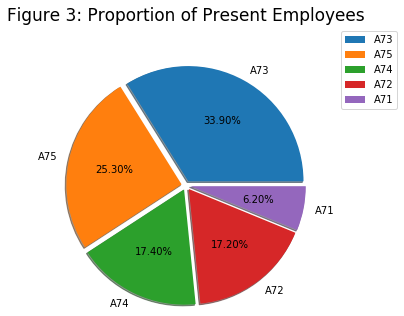

In [12]:
a = dataset['Present_Employment'].value_counts()
x1 = a.index
fig1 = plt.figure()
ax = fig1.add_axes([0,0,0.5,0.5])
ax.set_title("Figure 3: Proportion of Present Employees",fontsize = 17,x=0.5,y=1.6)
ax.pie(a,autopct ='%.2f%%',labels = x1,explode=(0.08,0.08,0.08,0.08,0.08),shadow = True,radius = 2.0)
ax.legend(loc = "right", bbox_to_anchor=(2,1.3,0,0))
plt.show()

### BiVariate Data Exploration

#### 4. Box-Plot of Housing and Present Residence Time

- The following Figure 4 shows the Box plot of Credit Amount and Housing.
- It can be observed that the people with `free housing` have the `maximum range of Credit Amount`.

In [13]:
dataset['Housing'].value_counts()

A152    713
A151    179
A153    108
Name: Housing, dtype: int64

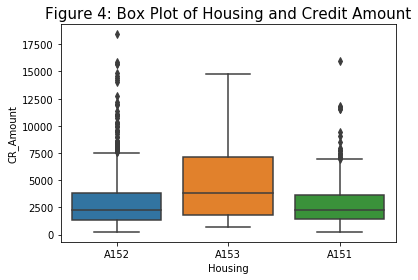

In [14]:
sns.boxplot(dataset['Housing'],dataset['CR_Amount']).set_title("Figure 4: Box Plot of Housing and Credit Amount",fontsize = 15);
plt.show()

#### 5. Credit Amount and Credit History

- The following graph shows the range of box plots of Credit Amount and Credit History.
- It can be observed that `A33` category that is the population having an history of delay in paying off in the past have the maximum range of Credit amount, however there are no comparisn instances that can be drawn form this graph.

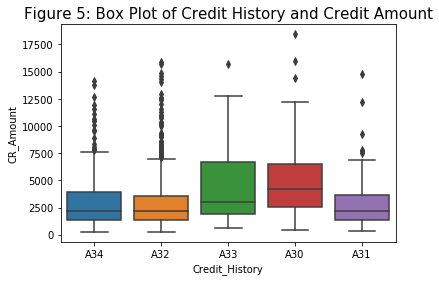

In [15]:
sns.boxplot(dataset['Credit_History'],dataset['CR_Amount']).set_title("Figure 5: Box Plot of Credit History and Credit Amount",fontsize = 15);
plt.show()

#### 6. Gender and Age

- The following graph shows the Age in years on Y axis and Gender-Status on X axis. 
- It is observed that the population considered for this data set is in between `20 to 60` years of age.

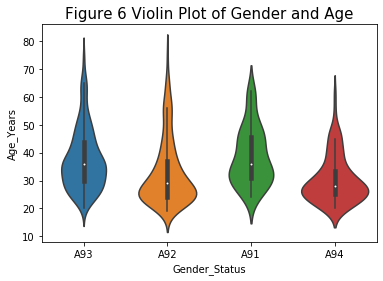

In [16]:
sns.violinplot(dataset['Gender_Status'],dataset['Age_Years']).set_title("Figure 6 Violin Plot of Gender and Age",fontsize = 15);
plt.show()

#### 7. Duration Of Months and Credit Amount

- The Following graphs shows a scatter plot of Duraiton of Months and Credit Amount. 
- It can be observed that the higher credit amounts have longer duration of months.

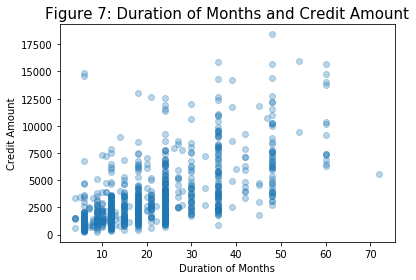

In [17]:
plt.scatter(dataset['Duration_Months'], dataset['CR_Amount'], alpha = 0.3)
plt.xlabel("Duration of Months")
plt.ylabel("Credit Amount")
plt.title("Figure 7: Duration of Months and Credit Amount",fontsize = 15 )
plt.show()

### Multivariate Graphs

#### 8. Age and  Credit Amount colored by Job Types

- Although there is no clear overall pattern, however, it can be observed that unemployed/unskilled non residents have the least credit amounts usually less than 7500 and the skilled employees and the management/self employeed have the highest credit amounts. 


- A171 stands for  unemployed/ unskilled - non-resident
- A172 stands for  unskilled - resident
- A173 stands for  skilled employee / official
- A174 stands for  management/ self-employed/highly qualified employee/ officer

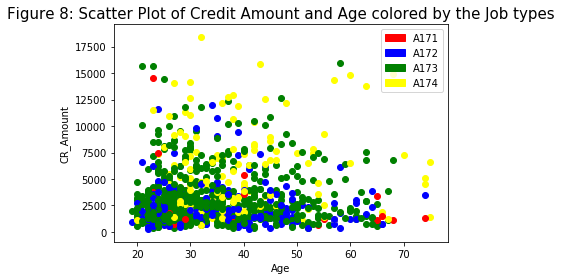

In [18]:
import matplotlib.patches as mpatches

plt.title("Figure 8: Scatter Plot of Credit Amount and Age colored by the Job types", fontsize = 15)
for n in range(0,1000):
    if dataset['Job'][n] == 'A171':
        plt.scatter(dataset['Age_Years'][n], dataset['CR_Amount'][n], color = 'red')
        plt.xlabel('Age')
        plt.ylabel('CR_Amount')
    elif dataset['Job'][n] == 'A172':
        plt.scatter(dataset['Age_Years'][n], dataset['CR_Amount'][n], color = 'blue')
        plt.xlabel('Age')
        plt.ylabel('CR_Amount')
    elif dataset['Job'][n] == 'A173':
        plt.scatter(dataset['Age_Years'][n], dataset['CR_Amount'][n], color = 'green')
        plt.xlabel('Age')
        plt.ylabel('CR_Amount')
    elif dataset['Job'][n] == 'A174':
        plt.scatter(dataset['Age_Years'][n], dataset['CR_Amount'][n], color = 'yellow')
        plt.xlabel('Age')
        plt.ylabel('CR_Amount')
Red_patch = mpatches.Patch(color = 'Red', label = 'A171')
Blue_patch = mpatches.Patch(color = 'Blue', label = 'A172')
Green_patch = mpatches.Patch(color = 'Green', label = 'A173')
Yellow_patch = mpatches.Patch(color = 'Yellow', label = 'A174')

plt.legend(loc = "upper right", handles = [Red_patch,Blue_patch,Green_patch,Yellow_patch])

#### 9. Customers Credit Amount and their Age by Instalment Rates


- In the next plot we are going to explore relation between three features: `Customers Credit Amount, Instalment Rate and Age in years`. We are using `3D Scatter Plot` to plot those features. We can find out the Maximum values of the three features from the graph.

Text(0.5, 0, 'Age in years')

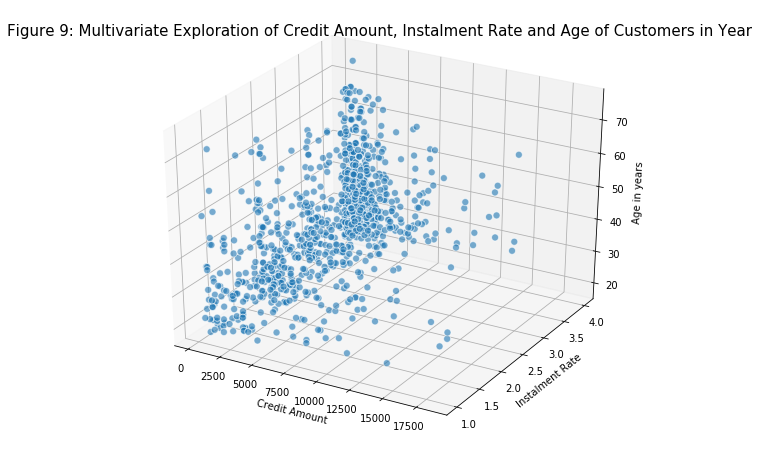

In [19]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("Figure 9: Multivariate Exploration of Credit Amount, Instalment Rate and Age of Customers in Year", fontsize =15)

xs = dataset['CR_Amount']
ys = dataset['Inst_Rate']
zs = dataset['Age_Years']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Credit Amount')
ax.set_ylabel('Instalment Rate')
ax.set_zlabel('Age in years')

### Encoding Categorical Descriptive Feature

Prior to modelling, we must encode all the Categorical features including target feature into the numeric values. For this purpose we can use two types of standard encoding techniques namely 'One-hot-encoding' and 'Integer-encoding'. Since we dont actually know the class value difference between values of ordinal features hence we are going to use One-hot-encoding for all the categorical values.

For encoding the Categorical features, first we will separate out the target feature from rest of the data and then find out categorical features from the dataset.

- Pandas series 'target' contain the target feature `Credit_Risk_Status` of the original dataset.
- After the above step, we drop this feature from the dataset and save rest of the data in 'data' dataframe.

we can check the shape of both 'data' and 'target'. Both have equal number of observation instances(rows).

In [20]:
target = dataset['Credit_Risk_Status']
data =dataset.drop(columns = 'Credit_Risk_Status')

In [21]:
data.shape

(1000, 20)

In [22]:
target.shape

(1000,)

#### Encoding the Target Feature.

The target feature contains 2 class values 1 which represents Good Credit_Risk_Status and 2 which represents Bad Credit_Risk_Status. Generally, Positive class is represented by 1 and negative class is represented by 0. So we are replacing value 2 with 0 for representing Bad Credit_Risk_Status.

In [23]:
target = target.astype(str)
print("The values of the target class before encoding are:")
print(target.value_counts())
print("_________________________________________________________\n")
print("The values of the target class after encoding are: ")
target = target.replace({'2': '0'})
print(target.value_counts())

The values of the target class before encoding are:
1    700
2    300
Name: Credit_Risk_Status, dtype: int64
_________________________________________________________

The values of the target class after encoding are: 
1    700
0    300
Name: Credit_Risk_Status, dtype: int64


In [24]:
target.unique()

array(['1', '0'], dtype=object)

#### Encoding all other Categorical Descriptive Features

In the next step we have to encode the categorical features into Numeric values using One-hot-encoding technique. For this purpose we have to find out the Categorical Features from the dataset 'data'. We are storing all the features with their datatype as `np.object` into the Categorical feature list.

In [25]:
categorical_cols = data.columns[data.dtypes==object].tolist()
categorical_cols

['Existing_CA_Status',
 'Credit_History',
 'Purpose',
 'Saving_Acc',
 'Present_Employment',
 'Gender_Status',
 'Other_Debtors',
 'Property',
 'Inst_Plans',
 'Housing',
 'Job',
 'Telephone_Status',
 'Foreign_Worker']

As we are planning to perform feature selection, we are going to define ***q*** dummy variables for Categorical Descriptive Features with ***q*** different levels. Only the excception is, when a certain Categorical feature is binary i.e 2 different levels, in that case we are going to define ***q-1*** i.e. only one dummy variables. 

The coding operation is shown below. For each two-level categorical variable, we set the drop_first option to True to encode the variable into a single column of 0 or 1. Next, we apply the `get_dummies()` function for the regular one-hot-encoding for categorical features with more than 2 levels. 

In [26]:
for col in categorical_cols:
    n = len(data[col].unique())
    if (n == 2):
        data[col] = pd.get_dummies(data[col], drop_first=True)

data = pd.get_dummies(data)

After encoding, we have few new dummy features in our dataset 'data'. we can checck the shape of dataset as well as columns in it. 

In [27]:
data.shape

(1000, 59)

In [28]:
data.columns

Index(['Duration_Months', 'CR_Amount', 'Inst_Rate', 'Present_Residence_Time',
       'Age_Years', 'Exsisting_CR_Count', 'Liability_Count',
       'Telephone_Status', 'Foreign_Worker', 'Existing_CA_Status_A11',
       'Existing_CA_Status_A12', 'Existing_CA_Status_A13',
       'Existing_CA_Status_A14', 'Credit_History_A30', 'Credit_History_A31',
       'Credit_History_A32', 'Credit_History_A33', 'Credit_History_A34',
       'Purpose_A40', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42',
       'Purpose_A43', 'Purpose_A44', 'Purpose_A45', 'Purpose_A46',
       'Purpose_A48', 'Purpose_A49', 'Saving_Acc_A61', 'Saving_Acc_A62',
       'Saving_Acc_A63', 'Saving_Acc_A64', 'Saving_Acc_A65',
       'Present_Employment_A71', 'Present_Employment_A72',
       'Present_Employment_A73', 'Present_Employment_A74',
       'Present_Employment_A75', 'Gender_Status_A91', 'Gender_Status_A92',
       'Gender_Status_A93', 'Gender_Status_A94', 'Other_Debtors_A101',
       'Other_Debtors_A102', 'Other_Debtors_A103

### Scaling Of Features
- Once we have encoded all the categorical features, we perform `Min-Max scaling` of all the descriptive features. 
- It is convienient to choose Min Max Scaling for this Data Set as after integer encoding it is observed that the values are 0 and 1.
- Hence after Min-Max Scaling we can obtain all the values in the range 0 - 1. 
- Before scaling the data set we copy Data to keep track of all the Feature Names.

In [29]:
from sklearn import preprocessing

scaledData = data.copy()
Data_Scaler = preprocessing.MinMaxScaler()
Data_Scaler.fit(data)
data = Data_Scaler.fit_transform(data)


In the below chunk the descriptive features are displayed after scaling. Since the output of the Scaler function is a `Numpy array`, all column names are lost, hence we add those from the previously stored copy of the data set.
The following observations can be made from the scaled data: 
- The `Binary features` are kept binary even after scaling.
- All the `Descriptive features` are in the range of 0-1.

In [30]:
pd.DataFrame(data, columns=scaledData.columns).sample(5, random_state = 999)

,Duration_Months,CR_Amount,Inst_Rate,Present_Residence_Time,Age_Years,Exsisting_CR_Count,Liability_Count,Telephone_Status,Foreign_Worker,Existing_CA_Status_A11,Existing_CA_Status_A12,Existing_CA_Status_A13,Existing_CA_Status_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Saving_Acc_A61,Saving_Acc_A62,Saving_Acc_A63,Saving_Acc_A64,Saving_Acc_A65,Present_Employment_A71,Present_Employment_A72,Present_Employment_A73,Present_Employment_A74,Present_Employment_A75,Gender_Status_A91,Gender_Status_A92,Gender_Status_A93,Gender_Status_A94,Other_Debtors_A101,Other_Debtors_A102,Other_Debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Inst_Plans_A141,Inst_Plans_A142,Inst_Plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
842,0.205882,0.093155,1.000000,1.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
68,0.470588,0.086332,1.000000,1.0,0.321429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
308,0.058824,0.054308,0.666667,1.0,0.089286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
881,0.294118,0.496699,0.333333,1.0,0.517857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
350,0.073529,0.054253,0.000000,1.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Feature Selection and Ranking <a class="anchor" id="5"></a>



Most important features are selected by using `Random Forest Feature Importance(RFI)` in the full data set. Random Forests are amongst the most popular machine learning methods known for thier relatively good accuracy, robustness and ease of use.
This is for the quick ranking of the most relevant 10 features to gain some insights of the data. During the hyper-parameter tuning phase, RFI will be included as a part of the pipelining process and we will search over 10, 20 and full set of 59 features to determine which set of features work best with each classifier.

We use `np.argsort()` method to sort the list of the features in the descending order of their RFI scores and then we choose first 10 features as the highly important 10 features for the modelling purpose.


In [31]:
from sklearn.ensemble import RandomForestClassifier
num_features = 10

model_rfi = RandomForestClassifier(n_estimators=100, random_state= 999)
model_rfi.fit(data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = scaledData.columns[fs_indices_rfi].values
best_features_rfi

array(['CR_Amount', 'Age_Years', 'Duration_Months',
       'Existing_CA_Status_A14', 'Inst_Rate', 'Existing_CA_Status_A11',
       'Present_Residence_Time', 'Saving_Acc_A61', 'Credit_History_A34',
       'Purpose_A40'], dtype=object)

In [32]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.10278397, 0.08216811, 0.08195924, 0.05667467, 0.03575125,
       0.03390708, 0.03344957, 0.020316  , 0.01960295, 0.01928142])

In the following chunks the important features are plotted with respect to thier importance using Altair Graphs

In [33]:
%config InlineBackend.figure_format = 'retina'

import altair as alt
alt.renderers.enable('html') # required in Jupyter notebooks

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [34]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'Blue')

alt.Chart(...)

Here,  we can check out from the above graph that, `CR_Amount` is the most important feature along with `Duration-months` and `Age_Years` while considering top 10 RFI features. We include this in the below pipeline execution to check the Model performance for top 10, 20 and all the features(59) in the encoded dataset.

# Data Modelling <a class="anchor" id="6"></a>


## Train-Test Splitting of the Dataset.


Before starting the deifferent modelling process using different algorithms, first we have to split the dataset into `Train` and `Test` datasets. We are going to train our model  and Tune it only on the Training dataset and then we are going to predict the performance of the model on the Test dataset.

For the simplification of the process, as we have comparitively less amount of data, we are going to perfrom 70:30 splitting in which 70% of the total data set is used for the Training and HP tuning while we are going to predict the Test dataset to check the performance of the model on unseen data.

To achieve this, we are using `train_test_split()` function from the `sklearn.model_selection` package.

In [35]:
from sklearn.model_selection import train_test_split

Data_sample_train, Data_sample_test,target_sample_train, target_sample_test = train_test_split(data, target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target)

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(700, 59)
(300, 59)


## Model Evaluation Strategy

From above step, we can see that we are going to train and tune our classification models on the 700 observation instances and will test the performance of each of the model on remianing 300 unseen instances.

For each model, we are going to use Stratified K-Fold Cross-Validation evaluation method with **5 folds** with **2 repititions** for the Hyper Parameter Tuning.

we are using `StratifiedKFold()` method for this purpose.

In [36]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5,random_state=999)

# Hyperparameter Tuning <a class="anchor" id="7"></a>



# 1. K-Nearest Neighbours (KNN)

- Using Pipeline, we stack `feature selection` and `grid search` for KNN hyperparameter tuning via cross-validation. We will use the same Pipeline methodology for NB and DT and Random Forest Ensemble.


- KNN is a distance based classification algorithm technique.  we are using Euclidean and Manhattan distances to calculate the performance of the algorithm on our data.


- For KNN hyperparameters are: 


    - Number of Neighbours(`n-neighbors`)i.e. value of K and
    - The distance metric `p` (1= Manhattan and 2 = Euclidean).
    
    
- For feature selection, we are using  Random Forest Importance (RFI) method with 100 estimators.we define the custom `RFIFeatureSelector()` class below to pass in RFI as a "step" to the pipeline.

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100, random_state =999)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

The following code chunk represents a `pipeline()` function which is responsible for following tasks:

- The pipeline function implements KNN algorithm on the data returned by RFI FeatureSelector.
- RFIFeatureSelector computes RFI scores for each feature in the dataset and returns specified number of TOP RFI scored features.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, data.shape[1]],
                   'knn__n_neighbors': [10, 15, 20, 25, 30],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [39]:
import warnings
warnings.filterwarnings("ignore")
gs_pipe_KNN = gs_pipe_KNN.fit(Data_sample_train, target_sample_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:   25.8s finished


In [40]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 20, 'knn__p': 1, 'rfi_fs__n_features_': 59}

In [41]:
gs_pipe_KNN.best_score_

0.7348153547133137

Here,  we observe that, Optimal KNN model has mean AUC score of 0.7348. The best performing KNN selected 20 nearest neighbours and all the 59 features with value of p = 1 i.e. Manhattan distance.

Even though, we get the optimal score and conditions for a optimal KNN model, we have to see the difference between performance of KNN with different combinations of the hyperparameters. we can see the difference between their `mean_score` values. 

In [42]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [43]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head(5)

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
14,0.734815,0.025957,0.779883,0.708819,20.0,1.0,59.0
8,0.733503,0.018448,0.766885,0.715500,15.0,1.0,59.0
25,0.730224,0.033539,0.775389,0.684038,30.0,1.0,20.0
17,0.729106,0.029015,0.776968,0.690355,20.0,2.0,59.0
28,0.728110,0.037205,0.777211,0.672133,30.0,2.0,20.0


- A minimal difference of 0.001 can be observed in the `mean_score` between 1st optimal and 2nd optimal models of KNN hyperparameter values.

- It can also be observed that most of the top 5 mean scores are generated when calculating scores with all the descriptive features i.e all the 59 features taken into consideration.

- Hence, we have plotted a graph for results of a Grid Search corresponding to all the 59 features that got selected.

In [44]:
results_KNN_59_Features = results_KNN[results_KNN['rfi_fs__n_features_'] == 59.0]

alt.Chart(results_KNN_59_Features, 
          title='KNN Performance Comparison with 59 features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='Values of Distance Metric P')
)

alt.Chart(...)

We can see from the above graph that, AUC_ROC scores are not increasing after the number of neighbors 20.  Hence,  we can say that, `K =20`  is a optimal hyperparameter value which gives us optimal performance of the model.

# 2. (Gaussian) Naive Bayes (NB) 


The Next model is Gaussian Naive Bayes (NB). It is a probabilty based classification algorithm. We are using `var_smoothing` (variant of Laplace Smoothing) as a hyperparameter to tune our model. By default, the `var_smoothing` parameter's value is $10^{-9}$ . We conduct the grid search in the `logspace` (over the powers of 10) sourced from `NumPy`. We will start with $10^{0}$  and end with  $10^{-9}$  and we will try 100 different values.

As Gaussian Naive Bayes considers probability is noramlly distributed, Before fitting our data into the Naive Bayes model we need to normalise the probability of each value. For this purpose we are going to perform pwoer transforamtion of Training data.

In [45]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(Data_sample_train)

In [46]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, data.shape[1]],
                  'nb__var_smoothing': np.logspace(0,-9, num=100)}


gs_pipe_NB = GridSearchCV(estimator=pipe_NB, 
                          param_grid=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

In [47]:
gs_pipe_NB.fit(Data_sample_train_transformed, target_sample_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 1244 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-2)]: Done 1500 out of 1500 | elapsed:  3.1min finished


In [48]:
gs_pipe_NB.best_params_

{'nb__var_smoothing': 0.8111308307896871, 'rfi_fs__n_features_': 20}

We can see from the above that hyper parameters for optimal NB performance are `var_smoothing` of 0.8111 and with top `20` features selected by RFI method. 

In [49]:
gs_pipe_NB.best_score_

0.7605928085519923

The performance score of the optimal NB model is 0.7605 which higher than optimal KNN score which is calculated above. That means the model has approximately `76.1% ROC_AUC` score.

We try to visualize other results in the grid search by ploting a chart of var_smoothing factor against AUC Score for every number of features we selected (10, 20 and 59). We can visualize other scores with the help of below graph.

In [50]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head(5)

,mean_score,std_score,max_score,min_score,nb__var_smoothing,rfi_fs__n_features_
4,0.760593,0.029212,0.793975,0.714529,0.811131,20.0
1,0.760398,0.028542,0.791545,0.714529,1.000000,20.0
10,0.760398,0.029864,0.797619,0.714286,0.533670,20.0
7,0.760350,0.029574,0.795190,0.714043,0.657933,20.0
19,0.760253,0.030370,0.801506,0.714286,0.284804,20.0


In [51]:
alt.Chart(results_NB, 
          title='NB Performance Comparison with All the features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('rfi_fs__n_features_:N', title='Number of Features selected')
)

alt.Chart(...)

# 3. Decision Tree(DT)

- Decision Tree Learning is one of the predictive modelling approaches which uses Decision Trees to go from observations about an item to conclusions about an item's target value. 

- Decision Trees hyperparameters are as follows: 
    - `Max_Depth` : The maximum depth of the tree.
    - `Split_criterion`: The tree can be split using 2 splits Gini Index and Entropy.
    - `Min_Sample_Spilt`: The minimum number of samples required to split an internal node.

- Feature selection is carried out using the Random Forest Importance(RFI) method with 100 estimators as defined in the `RFIFeatureSelector()` class mentioned above. 
----
The following code chunk represents a `pipeline()` function which is responsible for following tasks:

- The pipeline function implements Decision Tree algorithm on the data returned by RFI FeatureSelector.
- RFIFeatureSelector computes RFI scores for each feature in the dataset and returns specified number of TOP RFI scored features.

The `GridSearchCV()` function performs an exhaustive search over specified parameter values for an estimator.

In [52]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__min_samples_split': [2, 5, 10]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:   36.6s finished


In [53]:
gs_pipe_DT.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 5,
 'dt__min_samples_split': 10,
 'rfi_fs__n_features_': 20}

In [54]:
gs_pipe_DT.best_score_

0.703206997084548

- It can be observed that the optimal Decision Tree has mean AUC score of 0.703. The best performing DT selected `entropy criterion, max_depth 5, min_samples_split 10 and all the 20 features`.

- Even though we have obtained the best score, we need to find the difference between the performance of DT with combination of different hyperparameters.

- The difference can be observed in the `Mean_score` values.

In [55]:
results_DT = get_search_results(gs_pipe_DT).round(3)
results_DT.head(5)

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
52,0.703207,0.0386538,0.76725,0.648567,entropy,5,10,20
53,0.700267,0.0434598,0.760569,0.628887,entropy,5,10,59
26,0.695554,0.0512508,0.78535,0.63654,gini,5,10,59
0,0.694485,0.0345392,0.753158,0.648445,gini,3,2,10
3,0.694485,0.0345392,0.753158,0.648445,gini,3,5,10


- A minimal difference of 0.003 can be observed between the 1st and the 2nd optimal mean score values of the DT hyperparameter values.

- We plot a graph for results of the Grid search corresponding to **10**, **20** and  **59** features.


In [56]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

In [57]:
results_DT_20_features = results_DT[results_DT['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_DT_20_features, 
          title='DT Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

In [58]:
results_DT_59_features = results_DT[results_DT['rfi_fs__n_features_'] == 59.0]

alt.Chart(results_DT_59_features, 
          title='DT Performance Comparison with 59 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

# Random Forest Classifier(RF)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- Since a Random Forest ensembler uses collection of Decision trees to to esitmate the prediction it shares some similar features of the hyperparameters which are as follows: 
    - `Max_Depth` : The maximum depth of the tree.
    - `Split_criterion`: The tree can be split using 2 splits Gini Index and Entropy.
    - `n_estimators`: The number of trees in a forest. 


In [59]:
from sklearn.ensemble import RandomForestClassifier
pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestClassifier(random_state =999))])

params_pipe_RF = {'rf__n_estimators': [120, 200, 250],
                  'rf__max_depth': [4, 5, 6],
                  'rf__criterion': ['gini', 'entropy'],
                  'rfi_fs__n_features_': [10, 20, data.shape[1]]
                  }

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_RF.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:  1.5min finished


In [60]:
gs_pipe_RF.best_score_

0.7866375121477163

In [61]:
gs_pipe_RF.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 5,
 'rf__n_estimators': 250,
 'rfi_fs__n_features_': 59}

- It can be observed that the optimal Random Forest Ensemble has mean AUC score of 0.7866. The best performing RF selected `entropy criterion, max_depth 5, n_estimators 250 and all the 59 features`.

- Even though we have obtained the best score, we need to find the difference between the performance of RF with combination of different hyperparameters.

- The difference can be observed in the `Mean_score` values.

In [62]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head(5)

,mean_score,std_score,max_score,min_score,rf__criterion,rf__max_depth,rf__n_estimators,rfi_fs__n_features_
44,0.786638,0.0311885,0.825559,0.734208,entropy,5,250,59
41,0.786054,0.0324027,0.82483,0.730564,entropy,5,200,59
53,0.785374,0.0276988,0.824587,0.745384,entropy,6,250,59
50,0.784111,0.0279647,0.823129,0.74344,entropy,6,200,59
17,0.783965,0.034582,0.834062,0.730321,gini,5,250,59


- A minimal difference of 0.001 can be observed between the 1st and the 2nd optimal values of the RF hyperparameter values.

- It can be observed from the above values that the top mean values are obtained while considering **59** features. 

- Hence, we plot a graph for results of the Grid search corresponding to **59** features.

In [63]:
results_RF_59_features = results_RF[results_RF['rfi_fs__n_features_'] == 59.0]

alt.Chart(results_RF_59_features, 
          title='RF Performance Comparison with 59 Features'
         ).mark_line(point=True).encode(
    alt.X('rf__max_depth', title='Max Depth of the Tree'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('rf__criterion:N', title='criterion')
)

alt.Chart(...)

# Performance Evaluation <a class="anchor" id="8"></a>


During Hyperparameter tuning phase we used 700 observation samples as a Training data within a cross-validation framework. We found out the best hyperparameter values for each of the 4 classifiers. For example, for KNN, it turned out that it worked best with value of K as 20,  with P =1 i.e Manhattan distance metric and by taking all 59 features into account.

Now it is time to test these best performed tuned classfiers on the Test dataset to check the performance of the models on unseen data. We are going to perform this using 10 fold cross-validation without any repititions. For this purpose we are using `cross_val_score method` from the `sklearn.model_selection` package.

1. **KNN** on the test data: 

In [64]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.7444444444444445

2. **NB (Naive Bayes)** on the test data: 
   
   Before calculating the performance we have to normalize each probability value by using power tranformation on the test      dataset.

In [65]:
Data_sample_test_transformed = PowerTransformer().fit_transform(Data_sample_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.752910052910053

3. **Decision Trees (DT)** on the test data:


In [66]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7113756613756613

4. **Random Forest Ensemble** on the test data:

In [67]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7883597883597883

As we can see from our results, Random Forest is working with better performance than all other classifiers on the unseen data. The next step is to check the Statistical Significance of these scores using paired statistical t-tests. We can see from the above that, perfromance of Random forest (RF) (0.7883) is slightly higher that that of Naive Bayes (NB)(0.752).

Hence we are going to check the statistical significance of the score of these two classification models.

To perform the statistical paired T-tests we are using `ttest_rel()` function from the scipy stats library package. 

In [68]:
from scipy import stats

print(stats.ttest_rel(cv_results_NB, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=-1.847148735065825, pvalue=0.09779358355358424)
Ttest_relResult(statistic=-2.7038077932704687, pvalue=0.02424205755138577)
Ttest_relResult(statistic=-2.1121922481003104, pvalue=0.06384210478804028)
Ttest_relResult(statistic=0.7913699829612472, pvalue=0.44908050240877695)
Ttest_relResult(statistic=-0.4135166166932492, pvalue=0.6889075434373727)
Ttest_relResult(statistic=-0.998874968142931, pvalue=0.34395224491849563)


As P-values smaller than 0.05 represents statistically significant difference. Even though the performance of the RF is better than NB by slightly higher percentages, by looking at the above result we can conclude that at a 95% significance level difference between the scores of Random Forest classifier and naive Bayes classifier is **not statistically significant**.

We are using AUC score to check the performance of the models. We can consider other metrics to determine the performance of the classifiers like

- Accuracy
- Precision
- F1 Score
- Recall

etc.


In the last step we are going to show the confusion matrices for each of the classifiers. Confusion matrix is also one of the measures to check the performance of the classifier. For this purpose we are going to store predictions of each classifier on the test data into seperate lists and plot them against the target test data. We are using `skelearn metrics` to draw confusion matrices.

These matrices are in the format : 
Thus in binary classification, the count of true negatives is at position [0,0] , false negatives is at [1,0] , true positives is at [1,1] and false positives is at [0,1] .

In [69]:
pred_KNN = gs_pipe_KNN.predict(Data_sample_test)
Data_test_transformed = PowerTransformer().fit_transform(Data_sample_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)
pred_DT = gs_pipe_DT.predict(Data_sample_test)
pred_RF = gs_pipe_RF.predict(Data_sample_test)

In [70]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_sample_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_sample_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_sample_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(target_sample_test, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[ 31  59]
 [ 13 197]]

Confusion matrix for Naive Bayes
[[ 27  63]
 [ 16 194]]

Confusion matrix for Decision Tree
[[ 32  58]
 [ 33 177]]

Confusion matrix for Random Forest
[[ 12  78]
 [  4 206]]


# Limitations and Proposed Solutions<a class="anchor" id="9"></a>

- The modelling strategy has some flaws and limitations. First the data collected is skewed and has class imbalance problem hereby preventing us from using different performance measuring techniques such as Accuracy, F1-score, Precision, Recall etc hence we have used mean AUC scores to check the performance of the model as ROC AUC is robust towards class imbalance problems.

- Secondly, various different combinations of the RFI Feature selector can be used to test the performance of the models. We have tested the models on 10,20 and 59 features.

- We have tuned the model hyperparameters to a limit, we can re-run our experiments and try various different combinations for tuning the data. Since the Random Forest Ensembler method statistically outperforms other methods, different n_estimators can be used to tune the model to increase the mean AUC score.

- K-fold cross validation techniques have been used to validate the model, 5 Folds were used to validate the traning data and 10 folds were used to validate the testing data. In future repeated K-fold cross validation can be used as a validation technique.

- Other models such as Support Vector Machines and Neural networks can be considered and mean scores can be observed.


# Summary and Conclusion <a class="anchor" id="10"></a>

The Random Forest Ensembler(RF) with all 59 features selected by Random Forest Importance(RFI) produces the highest cross-validated AUC score for the training data. In addition, when evaluated on the test data in cross validated format, the Random Forest Ensembler(RF) outperforms Naive Bayes with slightly higher percentage with respect to the mean AUC score, however, the difference between the mean scores of Naive Bayes and Random Forest is not statistically significant.

Though RF classification model outperformes others like NB, KNN and DT models, It's performance difference is not statistically significant if we consider 95% significance level. If we consider the cost matrix provided with the data, using Random Forest ensembler gives more loss than a Naive Bayes classfier.

The cost Matrix provided is : 

          0        1
    ----------------------------
     0    0        5
    ----------------------------
     1    1        0


It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

when we try to multiply the resultant confusion matrices of RF and NB with the cost matrix above, we found out that, `with NB,  the loss cost is much lesser than that of the RF clssifier`.

Hence, we can say that, having best performance accuracy is not good enough when it comes to the selection of the ideal classification model for a certain problem. There are many more parameters affecting to the model. Its always a trade-off between the precision and the recall of the model. Only having optimal precision or recall doesnt make it an overall optimal classification model.


# References <a class="anchor" id="11"></a>

- UCI Machine Learning Repository Collection of Data bases : https://archive.ics.uci.edu/ml/about.html

- Dr Vural Aksakalli, Zeren Yenice, Yong Kai Wong, Imran Ture, Milad Malekipirbazari https://www.featureranking.com/ SK Part 1: Basic Modeling Techniques.
    - https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/ SK Part 2: Feature Selection and Ranking
    - https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/ SK Part 3: Cross-Validation and Hyperparameter Tuning
    - https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-model-evaluation/ SK Part 4: Model Evaluation
    - https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-5-advanced-topics-pipelines-statistical-model-comparison-and-model-deployment/ SK Part 5: Advanced Topics: Pipelines, Statistical Model Comparison, and Model Deployment
    
- Regression Case Study(Predicting Age in Census Data):https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/ 
- Case Study: Predicting Income Status : https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/ 

- Towards Data Science : A Medium publication sharing concepts, ideas, and codes : https://towardsdatascience.com/ 
 




